<a href="https://colab.research.google.com/github/andremartins7/data_set_enem_2016/blob/master/Enem_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importar as bibliotecas a serem usadas
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Leitura dos datasets de treino e teste e criação do df de resposta
df_train = pd.read_csv('https://raw.githubusercontent.com/andremartins7/data_set_enem_2016/master/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/andremartins7/data_set_enem_2016/master/test.csv')
df_resposta = pd.DataFrame()

In [118]:
# Verificar se os dados de teste estão nos dados de treinamento
print(set(df_test.columns).issubset(set(df_train.columns)))

True


In [119]:
# colunas
df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [120]:
# Features que tem uma maior correlação com o nosso target (NU_NOTA_MT)
df_train.corr()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,...,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,CO_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
Unnamed: 0,1.000000,NaN,-0.007258,-0.007250,-0.007201,0.003678,0.005707,-0.006217,-0.004527,-0.004615,0.005852,-0.003362,-0.006252,0.011372,0.006717,-0.000351,-0.000586,-0.000214,-0.011217,-0.013523,0.019805,0.003334,NaN,0.007724,0.004315,NaN,0.005417,0.004539,0.000268,0.012234,-0.004620,NaN,0.003231,0.001924,0.011940,-0.010889,-0.007018,-0.000171,NaN,0.003136,...,NaN,0.003352,NaN,NaN,NaN,0.004508,0.002816,0.048289,-0.004246,-0.004350,0.017135,0.017135,0.017073,0.017073,0.000970,-0.008336,-0.006097,0.006530,0.007925,0.000369,-0.002789,-0.004959,-0.004945,-0.003911,-0.011240,-0.006711,-0.002971,0.012977,0.000160,0.023548,0.001520,0.018074,0.001693,-0.008141,0.002724,-0.004914,0.003906,0.001002,-0.010967,-0.029937
NU_ANO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_MUNICIPIO_RESIDENCIA,-0.007258,NaN,1.000000,0.999865,-0.002296,0.020813,-0.236178,0.009710,0.865294,0.865216,0.025402,-0.032664,0.041738,0.018070,-0.035317,0.983407,0.983630,0.983488,0.080064,-0.055710,0.024364,0.001188,NaN,-0.010872,0.012790,NaN,-0.001965,0.000846,0.012051,0.003969,0.001007,NaN,-0.007271,0.008818,-0.030268,-0.009254,0.000398,-0.014474,NaN,-0.003578,...,NaN,0.003713,NaN,NaN,NaN,0.008911,-0.003259,0.991124,0.982100,0.981955,-0.035441,-0.035441,-0.034269,-0.034269,0.085643,0.124272,0.130161,0.108850,-0.098682,-0.017227,0.069971,0.048547,0.051289,0.062718,0.044335,0.061549,-0.117804,-0.073321,-0.079831,-0.025616,0.004115,-0.030114,-0.050304,-0.050138,-0.040668,-0.013479,-0.032710,-0.094862,-0.077456,-0.033205
CO_UF_RESIDENCIA,-0.007250,NaN,0.999865,1.000000,-0.002017,0.020947,-0.234786,0.009433,0.864791,0.864919,0.025822,-0.032538,0.041406,0.018145,-0.034944,0.983393,0.983417,0.983552,0.079229,-0.054736,0.024666,0.001360,NaN,-0.010716,0.013035,NaN,-0.001914,0.000934,0.011867,0.003689,0.001093,NaN,-0.007216,0.008782,-0.029933,-0.009503,0.000516,-0.014365,NaN,-0.003675,...,NaN,0.003689,NaN,NaN,NaN,0.008251,-0.002454,0.991177,0.981938,0.982035,-0.035438,-0.035438,-0.034287,-0.034287,0.084534,0.122825,0.128479,0.107493,-0.096473,-0.016955,0.069195,0.047746,0.050400,0.061881,0.043565,0.060629,-0.117288,-0.073029,-0.078885,-0.025491,0.003968,-0.030345,-0.050096,-0.049292,-0.040688,-0.013647,-0.032467,-0.094113,-0.076838,-0.033149
NU_IDADE,-0.007201,NaN,-0.002296,-0.002017,1.000000,0.533462,0.009675,-0.017713,-0.030711,-0.030259,-0.253403,0.681435,-0.296328,0.516253,-0.295091,-0.019091,-0.019710,-0.019013,-0.082980,0.009653,0.007082,0.027907,NaN,0.006520,0.011380,NaN,0.036361,0.000696,-0.006294,0.000492,-0.004355,NaN,0.023470,0.018252,0.004965,0.006482,0.010583,0.074384,NaN,0.026882,...,NaN,0.021091,NaN,

In [121]:
# Verificando os valores nulos na base de treino
df_train[features].isnull().sum()

NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
dtype: int64

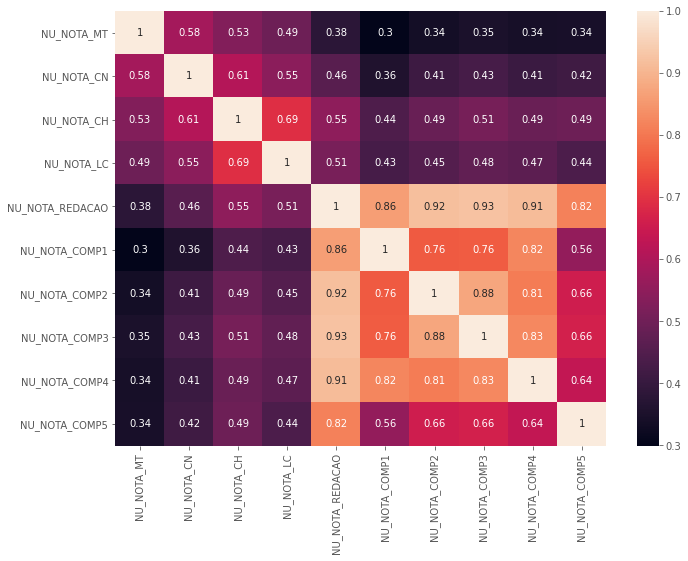

In [122]:
corr = df_train[features_corr].corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10})
plt.show()

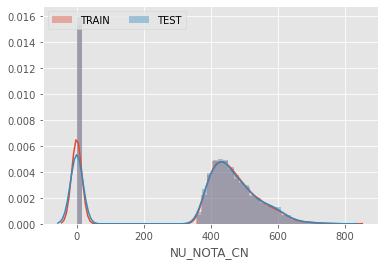

In [123]:
x0 = df_train['NU_NOTA_CN'].fillna(0)
x1 = df_test['NU_NOTA_CN'].fillna(0)


sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

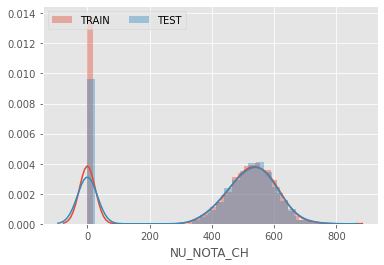

In [124]:
x0 = df_train['NU_NOTA_CH'].fillna(0)
x1 = df_test['NU_NOTA_CH'].fillna(0)


sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

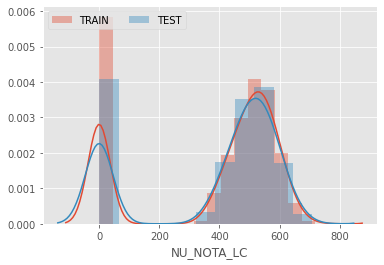

In [125]:
x0 = df_train['NU_NOTA_LC'].fillna(0)
x1 = df_test['NU_NOTA_LC'].fillna(0)


sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

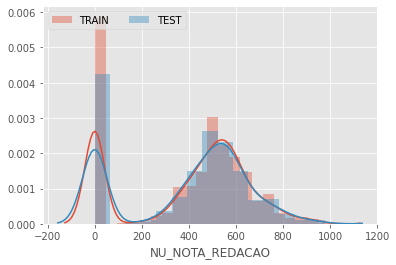

In [126]:
x0 = df_train['NU_NOTA_REDACAO'].fillna(0)
x1 = df_test['NU_NOTA_REDACAO'].fillna(0)


sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

In [0]:
# Seleciona somente linhas com valores nesses 4 quesitos a baixo na base de train
df_train = df_train.loc[
      (df_train['NU_NOTA_CN'].notnull())  & (df_train['NU_NOTA_CN'] != 0) & (df_train['NU_NOTA_CH'].notnull())      & (df_train['NU_NOTA_CH'] != 0) 
    & (df_train['NU_NOTA_LC'].notnull())  & (df_train['NU_NOTA_LC'] != 0) & (df_train['NU_NOTA_REDACAO'].notnull()) & (df_train['NU_NOTA_REDACAO'] != 0)    
]

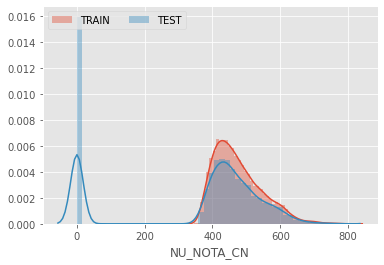

In [128]:
x0 = df_train['NU_NOTA_CN'].fillna(0)
x1 = df_test['NU_NOTA_CN'].fillna(0)


sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

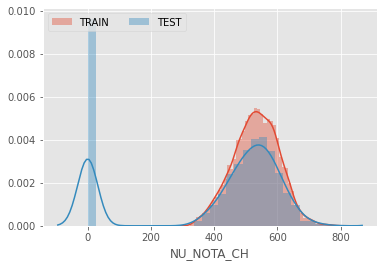

In [129]:
x0 = df_train['NU_NOTA_CH'].fillna(0)
x1 = df_test['NU_NOTA_CH'].fillna(0)


sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

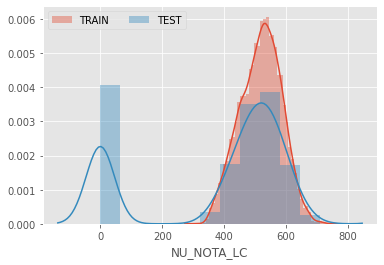

In [130]:
x0 = df_train['NU_NOTA_LC'].fillna(0)
x1 = df_test['NU_NOTA_LC'].fillna(0)


sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

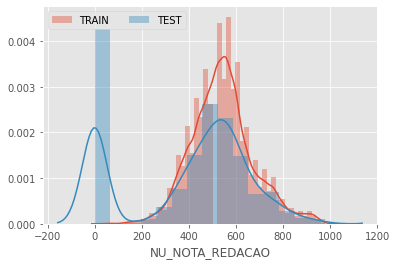

In [131]:
x0 = df_train['NU_NOTA_REDACAO'].fillna(0)
x1 = df_test['NU_NOTA_REDACAO'].fillna(0)


sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

In [0]:
# Salvar os dados das inscrições
df_resposta['NU_INSCRICAO'] = df_test['NU_INSCRICAO']

In [0]:
# Selecionar somente valores inteiros e floats
df_test = df_test.select_dtypes(include=['int64','float64'])

In [134]:
# Correlação das notas com a idade e se o aluno é treineiro ou não
var = ['NU_IDADE','IN_TREINEIRO','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']
df_test[var].corr()

,NU_IDADE,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
NU_IDADE,1.000000,-0.293714,-0.105278,-0.048229,-0.079171,-0.161202
IN_TREINEIRO,-0.293714,1.000000,-0.009669,-0.032181,-0.004934,-0.014277
NU_NOTA_CN,-0.105278,-0.009669,1.000000,0.598574,0.545801,0.442692
NU_NOTA_CH,-0.048229,-0.032181,0.598574,1.000000,0.679993,0.537141
NU_NOTA_LC,-0.079171,-0.004934,0.545801,0.679993,1.000000,0.495745
NU_NOTA_REDACAO,-0.161202,-0.014277,0.442692,0.537141,0.495745,1.000000


In [0]:
features = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']

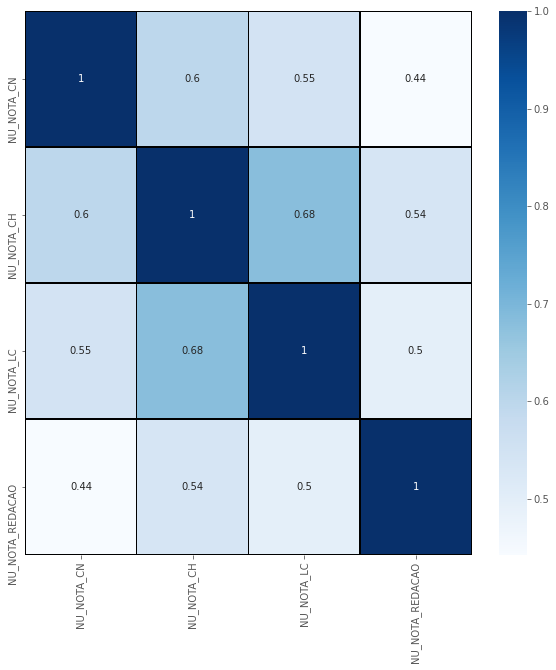

In [136]:
# Correlação das notas de provas
%matplotlib inline

plt.figure (figsize=(10,10))
sns.heatmap(df_test[features].corr(), annot=True, linewidths=0.5, linecolor='black', cmap='Blues')
plt.xticks(rotation=90)
plt.show()

In [0]:
# Usando o loc com uma condição composta para obter somente registros com todas as provas
df_train = df_train.loc[(df_train['NU_NOTA_CN'].notnull()) & (df_train['NU_NOTA_CH'].notnull())  & (df_train['NU_NOTA_LC'].notnull()) & (df_train['NU_NOTA_REDACAO'].notnull()) & (df_train['NU_NOTA_MT'].notnull())]

In [138]:
# Contabilização de notas de provas vazias
df_test[features].isnull().sum()

NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
NU_NOTA_REDACAO    1199
dtype: int64

In [0]:
# Selecionando somente valores diferentes de 0 e não nulos na base de test
df_test = df_test.loc[
      (df_test['NU_NOTA_CN'].notnull())  & (df_test['NU_NOTA_CN'] != 0) & (df_test['NU_NOTA_CH'].notnull())      & (df_test['NU_NOTA_CH'] != 0) 
    & (df_test['NU_NOTA_LC'].notnull())  & (df_test['NU_NOTA_LC'] != 0) & (df_test['NU_NOTA_REDACAO'].notnull()) & (df_test['NU_NOTA_REDACAO'] != 0)    
]

In [140]:
# Verificando a quantidade de notas ‘nulls’ na base de test
df_test[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
dtype: int64

In [0]:
# Preencher valores nulos com o valor médio - Tratamento das notas de provas corrompidas
df_train['NU_NOTA_CN'].fillna(df_train['NU_NOTA_CN'].mean(), inplace=True)
df_train['NU_NOTA_CH'].fillna(df_train['NU_NOTA_CH'].mean(), inplace=True)
df_train['NU_NOTA_REDACAO'].fillna(df_train['NU_NOTA_REDACAO'].mean(), inplace=True)
df_train['NU_NOTA_LC'].fillna(df_train['NU_NOTA_LC'].mean(), inplace=True)
df_test['NU_NOTA_CN'].fillna(df_train['NU_NOTA_CN'].mean(), inplace=True)
df_test['NU_NOTA_CH'].fillna(df_train['NU_NOTA_CH'].mean(), inplace=True)
df_test['NU_NOTA_REDACAO'].fillna(df_train['NU_NOTA_REDACAO'].mean(), inplace=True)
df_test['NU_NOTA_LC'].fillna(df_train['NU_NOTA_LC'].mean(), inplace=True)

Separação dos dados de treino (features) e da classe

In [0]:
# Classe
y = df_train['NU_NOTA_MT']

In [0]:
# Definição do dataset de treino somente com as informações relevantes para treinar o modelo
features = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']
x_train = df_train[features]

In [0]:
# Ajustando o Transformer API
scaler = preprocessing.StandardScaler().fit(x_train)

In [145]:
X_train_scaled = scaler.transform(x_train)
print('Media: {}'.format(X_train_scaled.mean(axis=1)))
print('Desvio Padrão: {}'.format(X_train_scaled.std(axis=0)))

Media: [-0.07054803  0.41283374 -0.20305777 ...  0.23783549  0.1553501
  0.3331491 ]
Desvio Padrão: [1. 1. 1. 1.]


In [0]:
x_test = df_test[features]

In [0]:
#n_estimators=100 (número de nós) , n_jobs=-1 ( todo o processamento possível) , warm_start=True (mantém o aprendizado e reprocessa o modelo, melhorando-o)
pipeline = make_pipeline(preprocessing.StandardScaler(), RandomForestRegressor(n_estimators=200, n_jobs=-1, warm_start=True))

In [0]:
# max_features : O número de features a considerar quando pesquisar pela melhor separação (testará as 3 opções e identificará a melhor para o modelo)
# max_depth :  Profundidade máxima da árvore de decisão. Se None (nenhuma), os nós serão expandidos até acabar as folhas ou até que elas contenham o mínimo valor de amostras possível.
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [149]:
# Ajustar e sintonizar o modelo
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
clf.fit(X_train_scaled, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                            

In [150]:
print(clf.best_params_)

{'randomforestregressor__max_depth': 5, 'randomforestregressor__max_features': 'sqrt'}


In [0]:
pred_notas = clf.predict(x_test)

In [0]:
df_resposta['NU_NOTA_MT'] = np.around(pred_notas,2)

In [0]:
# Exemplos de notas estimados
df_resposta['NU_NOTA_MT'].unique()

In [0]:
df_resposta.to_csv('answer.csv', index=False, header=True)

In [157]:
# Salvar o modelo preditivo
joblib.dump(clf, 'rf_regressor.pkl')

# Usar/carregar o modelo preditivo
clf2 = joblib.load('rf_regressor.pkl')
clf2.predict(x_test)

array([817.30692742, 817.30692742, 817.30692742, ..., 817.30692742,
       817.30692742, 817.30692742])